# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /Users/oliverhebnes/Documents/predicting-solid-state-qubit-material-hosts/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Empirical summary"
InsertApproach = "03-empirical-approach"
numberOfPrincipalComponents = 5

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_agl_heat_capacity_Cv_300K_per_atom,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,MP|spacegroup.number,MP|total_magnetization,MP|efermi,MP|Eg,AFLOWML|Eg,MP|Polar SG,candidate
0,mp-24,C8,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,0.634,3.043,0.000086,206,0.000000,9.783159,2.7785,3.355,0,1.0
1,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,0.588,3.223,0.000086,194,0.000000,9.983070,3.3395,3.166,0,1.0
2,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,0.617,4.279,0.000086,227,0.000000,9.614764,4.3387,3.593,0,1.0
3,mp-149,Si2,2.0,14,-0.153293,2.0,14,-0.153293,1.000000,1.000000,...,2.577,3.417,0.000061,227,0.000000,5.564646,0.8527,0.742,0,1.0
4,mp-165,Si4,2.0,14,-0.153293,2.0,14,-0.153293,1.000000,1.000000,...,2.549,3.443,0.000061,194,0.000000,5.891539,0.5139,0.667,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,2.709,2.690,0.000052,3,0.000351,3.917413,2.3186,2.156,1,0.0
586,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,2.515,2.749,0.000060,1,0.992766,3.987258,0.8079,0.000,1,0.0
587,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,2.496,2.841,0.000060,5,6.504784,4.184540,0.1221,0.000,1,0.0
588,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,2.654,2.725,0.000061,4,0.000485,2.323107,0.5907,0.000,1,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(24611, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
15379,mp-630227,C60,C,1.0,0.745573,1.0,1.0,1.0,0.81,1.0,0.999971
16142,mp-667273,C60,C,1.0,0.962428,1.0,1.0,1.0,0.85,1.0,0.999971
16394,mp-680372,C60,C,1.0,0.706199,1.0,1.0,1.0,0.83,1.0,0.999971
16471,mp-683919,C140,C,1.0,0.691006,1.0,1.0,1.0,0.79,1.0,0.999971
21326,mp-1194362,C28,C,0.0,0.453130,1.0,1.0,0.0,0.50,0.0,0.000014
22122,mp-1196583,C240,C,1.0,0.845936,1.0,1.0,1.0,0.82,1.0,0.999971
24096,mp-1203645,C48,C,0.0,0.228945,0.0,0.0,1.0,0.55,1.0,0.999971
24549,mp-1205417,C20,C,1.0,0.897293,0.0,0.0,0.0,0.40,0.0,0.000014


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
45,mp-344,B4N4,BN,1.0,0.768864,1.0,1.0,1.0,0.649500,1.0,0.999971
239,mp-1599,B4N4,BN,0.0,0.137328,1.0,1.0,1.0,0.610000,1.0,0.999971
242,mp-1639,B1N1,BN,1.0,0.995059,1.0,1.0,1.0,0.970000,1.0,0.999971
386,mp-2653,B2N2,BN,1.0,0.991214,1.0,1.0,1.0,0.970000,1.0,0.999971
3089,mp-13151,B4N4,BN,1.0,0.961877,1.0,1.0,1.0,0.851333,1.0,0.578944
5147,mp-20305,In1As1,InAs,1.0,0.997904,1.0,1.0,1.0,0.989744,1.0,0.999971
15771,mp-644751,B4N4,BN,1.0,0.926896,1.0,1.0,1.0,0.680333,0.0,0.006440
19242,mp-1077506,B3N3,BN,1.0,0.827147,1.0,1.0,1.0,0.665333,1.0,0.703995


## How many entries does the models agree on? 

In [10]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.989806,1.0,1.0,1.0,0.930000,1.0,0.999971
2,mp-14,Se3,Se,1.0,0.997753,1.0,1.0,1.0,0.970000,1.0,0.999971
3,mp-19,Te3,Te,1.0,0.997969,1.0,1.0,1.0,0.950000,1.0,0.999971
8,mp-111,Ne1,Ne,1.0,0.985734,1.0,1.0,1.0,0.949656,1.0,0.999971
10,mp-137,Ge12,Ge,1.0,0.997251,1.0,1.0,1.0,0.919744,1.0,0.999971
...,...,...,...,...,...,...,...,...,...,...,...
22122,mp-1196583,C240,C,1.0,0.845936,1.0,1.0,1.0,0.820000,1.0,0.999971
22297,mp-1197170,Zn24P16,Zn3P2,1.0,0.709249,1.0,1.0,1.0,0.558739,1.0,0.703995
22305,mp-1197203,Cd4Ag8Ge4S16,CdAg2GeS4,1.0,0.623851,1.0,1.0,1.0,0.679500,1.0,0.999971
22543,mp-1198022,Ge34,Ge,1.0,0.999363,1.0,1.0,1.0,0.900000,1.0,0.999971


In [11]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.989806,1.0,1.0,1.0,0.930000,1.0,0.999971
2,mp-14,Se3,Se,1.0,0.997753,1.0,1.0,1.0,0.970000,1.0,0.999971
3,mp-19,Te3,Te,1.0,0.997969,1.0,1.0,1.0,0.950000,1.0,0.999971
8,mp-111,Ne1,Ne,1.0,0.985734,1.0,1.0,1.0,0.949656,1.0,0.999971
10,mp-137,Ge12,Ge,1.0,0.997251,1.0,1.0,1.0,0.919744,1.0,0.999971
...,...,...,...,...,...,...,...,...,...,...,...
19877,mp-1104843,Zn2Cu4Si2Se8,ZnCu2SiSe4,1.0,0.919889,1.0,1.0,1.0,0.915000,1.0,0.999971
19948,mp-1105527,Zn2Cu4Ge2S8,ZnCu2GeS4,1.0,0.896809,1.0,1.0,1.0,0.804823,1.0,0.999971
20529,mp-1190284,Bi8Se9,Bi8Se9,1.0,1.000000,1.0,1.0,1.0,0.850000,1.0,0.999971
22122,mp-1196583,C240,C,1.0,0.845936,1.0,1.0,1.0,0.820000,1.0,0.999971


In [12]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.989806,1.0,1.0,1.0,0.930000,1.0,0.999971
2,mp-14,Se3,Se,1.0,0.997753,1.0,1.0,1.0,0.970000,1.0,0.999971
3,mp-19,Te3,Te,1.0,0.997969,1.0,1.0,1.0,0.950000,1.0,0.999971
8,mp-111,Ne1,Ne,1.0,0.985734,1.0,1.0,1.0,0.949656,1.0,0.999971
10,mp-137,Ge12,Ge,1.0,0.997251,1.0,1.0,1.0,0.919744,1.0,0.999971
...,...,...,...,...,...,...,...,...,...,...,...
22474,mp-1197798,H32,H2,0.0,0.319494,1.0,1.0,1.0,0.560000,1.0,0.999971
22543,mp-1198022,Ge34,Ge,1.0,0.999363,1.0,1.0,1.0,0.900000,1.0,0.999971
23082,mp-1199937,K81,K,1.0,0.977446,1.0,1.0,1.0,0.760333,1.0,0.999971
23672,mp-1202088,Mg4B8H32,Mg(BH4)2,0.0,0.051207,1.0,1.0,1.0,0.570000,1.0,0.999971


In [13]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.989806,1.0,1.0,1.0,0.930000,1.0,0.999971
2,mp-14,Se3,Se,1.0,0.997753,1.0,1.0,1.0,0.970000,1.0,0.999971
3,mp-19,Te3,Te,1.0,0.997969,1.0,1.0,1.0,0.950000,1.0,0.999971
8,mp-111,Ne1,Ne,1.0,0.985734,1.0,1.0,1.0,0.949656,1.0,0.999971
10,mp-137,Ge12,Ge,1.0,0.997251,1.0,1.0,1.0,0.919744,1.0,0.999971
...,...,...,...,...,...,...,...,...,...,...,...
20475,mp-1189914,Zn2Si2Ag4S8,ZnSi(AgS2)2,1.0,0.579735,1.0,1.0,1.0,0.778494,1.0,0.999971
20529,mp-1190284,Bi8Se9,Bi8Se9,1.0,1.000000,1.0,1.0,1.0,0.850000,1.0,0.999971
22122,mp-1196583,C240,C,1.0,0.845936,1.0,1.0,1.0,0.820000,1.0,0.999971
22543,mp-1198022,Ge34,Ge,1.0,0.999363,1.0,1.0,1.0,0.900000,1.0,0.999971


In [14]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.989806,1.0,1.000000,1.0,0.930000,1.0,0.999971
2,mp-14,Se3,Se,1.0,0.997753,1.0,1.000000,1.0,0.970000,1.0,0.999971
3,mp-19,Te3,Te,1.0,0.997969,1.0,1.000000,1.0,0.950000,1.0,0.999971
4,mp-25,N8,N2,1.0,0.981477,0.0,0.000000,1.0,0.719744,1.0,0.999971
8,mp-111,Ne1,Ne,1.0,0.985734,1.0,1.000000,1.0,0.949656,1.0,0.999971
...,...,...,...,...,...,...,...,...,...,...,...
23082,mp-1199937,K81,K,1.0,0.977446,1.0,1.000000,1.0,0.760333,1.0,0.999971
23523,mp-1201508,K16Si16,KSi,0.0,0.147863,0.0,0.151515,1.0,0.634296,1.0,0.999971
23672,mp-1202088,Mg4B8H32,Mg(BH4)2,0.0,0.051207,1.0,1.000000,1.0,0.570000,1.0,0.999971
23899,mp-1202941,Mg4B8H32,Mg(BH4)2,0.0,0.055811,1.0,1.000000,1.0,0.590000,1.0,0.999971


In [15]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.989806,1.0,1.0,1.0,0.930000,1.0,0.999971
2,mp-14,Se3,Se,1.0,0.997753,1.0,1.0,1.0,0.970000,1.0,0.999971
3,mp-19,Te3,Te,1.0,0.997969,1.0,1.0,1.0,0.950000,1.0,0.999971
4,mp-25,N8,N2,1.0,0.981477,0.0,0.0,1.0,0.719744,1.0,0.999971
5,mp-77,S32,S,1.0,0.957777,0.0,0.0,1.0,0.510000,0.0,0.000014
...,...,...,...,...,...,...,...,...,...,...,...
23682,mp-1202132,Sr5Ti7O19,Sr5Ti7O19,1.0,1.000000,0.0,0.0,0.0,0.320000,0.0,0.000014
23992,mp-1203253,S28N4,S7N,1.0,0.650605,0.0,0.0,0.0,0.390000,0.0,0.000014
24027,mp-1203368,Zn48As32,Zn3As2,1.0,0.755664,0.0,0.0,0.0,0.483579,1.0,0.999971
24525,mp-1205354,Sc8Se12,Sc2Se3,1.0,0.538900,0.0,0.0,0.0,0.380246,0.0,0.236949


In [16]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-11-04-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


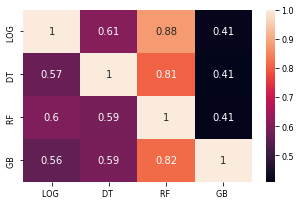

[1.0, 0.5691699604743083, 0.5098814229249012, 0.32430453879941434, 0.4084919472913616, 0.587117212249208, 0.41215226939970717, 1.0, 1.0, 0.4136163982430454, 0.599802371541502]


,LOG LOG LOG LOG,LOG LOG LOG DT,LOG LOG RF DT,LOG RF GB DT,DT GB DT DT,DT RF DT DT,RF RF GB GB,RF RF RF RF,GB GB GB GB,GB LOG LOG LOG,RF LOG LOG LOG
LOG LOG LOG LOG,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802
LOG LOG LOG DT,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802
LOG LOG RF DT,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802
LOG RF GB DT,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802
DT GB DT DT,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802
DT RF DT DT,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802
RF RF GB GB,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802
RF RF RF RF,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802
GB GB GB GB,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802
GB LOG LOG LOG,1.0,0.56917,0.509881,0.324305,0.408492,0.587117,0.412152,1.0,1.0,0.413616,0.599802


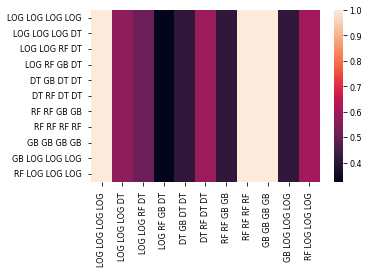

In [17]:
visualize.visualize_heatmap_of_combinations(Summary)

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1020.93it/s]
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


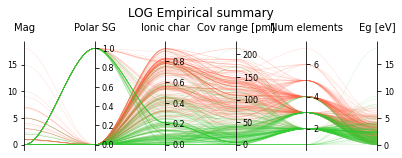

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1083.55it/s]


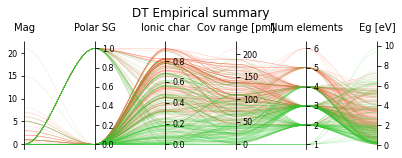

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1986.26it/s]


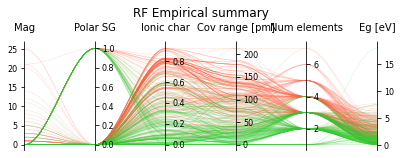

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1460.96it/s]


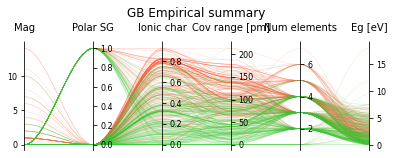

In [18]:
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)